In [73]:
#Bibliotheken

import numpy as np
import matplotlib.pyplot as plt

from sympy import symbols, Eq, solve, simplify

#Bestimmung der ungedämpften Periodendauer
###################################################

#10 Messungen
t10= np.array([[17.94, 17.7, 17.99, 17.44, 17.63, 17.83, 17.36, 17.76, 18.21, 17.88]])

#Periodendauer
t0 = t10 / 10

# Mittelwert berechnen
mw_t0 = np.mean(t0)

# Standardabweichung berechnen
stabw_t0 = np.std(t0)

# Ausgabe von Mittelwert und Standardabweichung
print("Mittelwert:", mw_t0)
print("Standardabweichung:", stabw_t0 )


Mittelwert: 1.7773999999999996
Standardabweichung: 0.02424953607803662


In [74]:
#Bestimmung der Eigenfrequenz
###################################################

f0 = 1/mw_t0 
print("Eigenfrequenz:", f0)

# Berechne den maximalen Fehler von f0
Df0 = abs(-1 / mw_t0**2) * stabw_t0

print("Maximaler Fehler von f0:", Df0)

Eigenfrequenz: 0.5626195566557894
Maximaler Fehler von f0: 0.007675966713926824


Erregerfrequenz: [[0.29770765 0.37418148 0.84245998]]
Erregerfrequenz bei 0V: -0.07608377201586353
Steigung: 0.09171581201588748


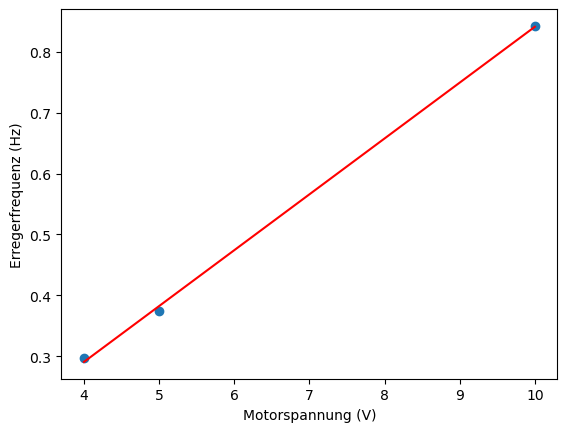

In [75]:
##Bestimmung der Erregerfrequenz und Kalibrierung des Antriebs

#Motorspannng
Umot = np.array([[4, 5, 10]])
#Zugehörige t10
t10_mot = np.array([[33.59, 26.725, 11.87]])
#Zugehörige t0
t0_mot = t10_mot/10
#Zugehörige fE
fE = 1/t0_mot
print("Erregerfrequenz:", fE)

# Lineare Regression 
coefficients = np.polyfit(Umot.flatten(), fE.flatten(), 1)
fit = np.poly1d(coefficients)
fE_0 =coefficients[1]
steigung = coefficients[0]
print("Erregerfrequenz bei 0V:", fE_0)
print("Steigung:", steigung)

plt.xlabel('Motorspannung (V)')
plt.ylabel('Erregerfrequenz (Hz)')
plt.scatter(Umot.flatten(), fE.flatten())
plt.plot(Umot.flatten(), fit(Umot.flatten()), color='red')

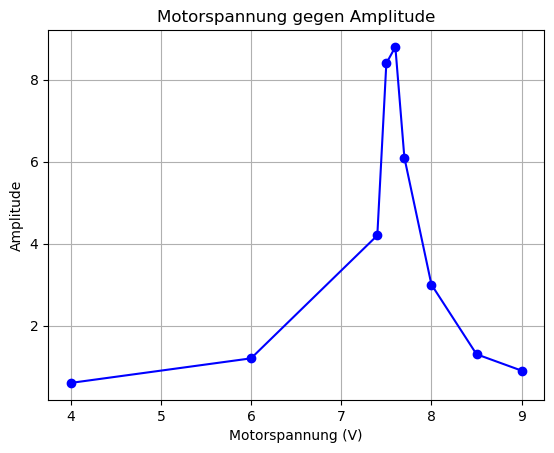

In [76]:
#Resonanzkurven

#Motorspannng
Umot_res = np.array([[4, 6, 7.4, 7.5, 7.6, 7.7, 8, 8.5, 9]])
A = np.array([[0.6, 1.2, 4.2, 8.4, 8.8, 6.1, 3, 1.3, 0.9]])
             
# Plot
plt.plot(Umot_res.flatten(), A.flatten(), marker='o', linestyle='-', color='blue')
plt.xlabel('Motorspannung (V)')
plt.ylabel('Amplitude')
plt.title('Motorspannung gegen Amplitude')
plt.grid(True)
plt.show() 